# MSBA7011 Homework 2

## Q1: Program a Gradient Descent

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

Get a brief glance at the function and we can see from plot that the local minimum is gonna be near around (-10, 5).

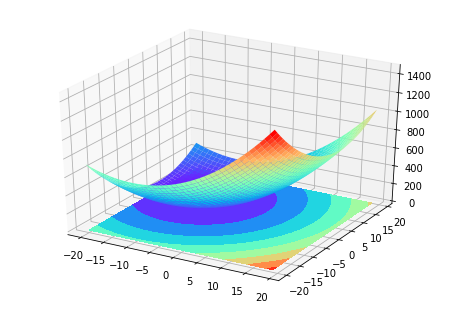

In [2]:
fig = plt.figure()
ax = Axes3D(fig)
# X, Y value
X = np.arange(-20, 20, 1)
Y = np.arange(-20, 20, 1)
X, Y = np.meshgrid(X, Y)
f = lambda x, y:(x+10)**2 + (y-5)**2
# Height value
Z = f(X,Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.get_cmap('rainbow'))

In [3]:
# Get partial derivatives of the function.
x = Symbol('x')
y = Symbol('y')
f = (x+10)**2 + (y-5)**2

print('dx=',f.diff(x))
print('dy=',f.diff(y))

dx= 2*x + 20
dy= 2*y - 10


Therefore, the math expressions of gradient descent are shown below.

$$ \frac{\partial f}{\partial x} = 2x+20\tag{1}$$
$$ \frac{\partial f}{\partial y} = 2y-10\tag{2}$$
$$ x := x-\lambda\frac{\partial f}{\partial x}\tag{3} $$
$$ y := y-\lambda\frac{\partial f}{\partial y}\tag{4} $$

In [4]:
f = lambda x, y:(x+10)**2 + (y-5)**2

def gradient_descent(l_rate, iterations):
    x_list = [0]
    y_list = [0]
    f_list = [f(0,0)]
    
    for i in range(iterations):
        x = x_list[-1]
        y = y_list[-1]
        dx = 2*x+20 
        dy = 2*y-10
        x = x - dx*l_rate
        y = y - dy*l_rate
        x_list.append(x)
        y_list.append(y)
        f_list.append(f(x,y))
 
    print("Local minimum occurs at (x,y):", str(x_list[-1]), str(y_list[-1]))
    print("Minimum value is:", str(f_list[-1]),'\n')
    return f_list

In [5]:
f_list = gradient_descent(0.01, 1000)

Local minimum occurs at (x,y): -9.999999983170325 4.999999991585162
Minimum value is: 3.540474688927067e-16 



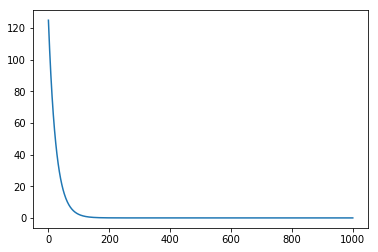

In [6]:
# Plot the function value after each iteration.
plt.plot(f_list)

(b) For each fixed learning rate η = {0.001, 0.1, 1}, repeat part (a).

Local minimum occurs at (x,y): -8.649354775533165 4.324677387766583
Minimum value is: 2.2803031529688322 

Local minimum occurs at (x,y): -9.999999999999996 4.999999999999998
Minimum value is: 1.5777218104420236e-29 

Local minimum occurs at (x,y): 0 0
Minimum value is: 125 



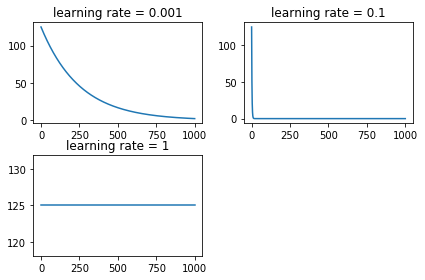

In [7]:
lr_list = [0.001, 0.1, 1]
k = 1
for lr in lr_list:
    f_list = gradient_descent(lr, 1000)
    plt.subplot(2,2,k) 
    plt.tight_layout()
    plt.plot(f_list)
    plt.title("learning rate = %s"%lr)
    k += 1

## Q2: CNN-MNIST

In [8]:
# Draw things on the Jupyter Notebook
%matplotlib inline  

# Importing
import numpy as np
import tensorflow as tf

In [9]:
# Load the data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("DATA/MNIST/", one_hot=True)

test_x = mnist.test.images
test_y = mnist.test.labels

Extracting DATA/MNIST/train-images-idx3-ubyte.gz
Extracting DATA/MNIST/train-labels-idx1-ubyte.gz
Extracting DATA/MNIST/t10k-images-idx3-ubyte.gz
Extracting DATA/MNIST/t10k-labels-idx1-ubyte.gz


In [10]:
# Define some parameters about the data
num_cls = 10

img_size = 28
img_length = img_size * img_size

num_color_channels = 1

In [11]:
# Define some parameters for CNN
k1_size = 5
num_k1 = 16

k2_size = 5
num_k2 = 32

k3_size = 3
num_k3 = 64

num_h4 = 256

In [12]:
# TensorFlow Setup

# Some parameters
num_iter = 10000
batch_size = 50

# Placeholder variables
x = tf.placeholder(dtype=tf.float32, shape=[None, img_length])
y_true = tf.placeholder(dtype=tf.float32, shape=[None, num_cls])
x_image = tf.reshape(x, [-1, img_size, img_size, num_color_channels])

# CONV1
W1 = tf.Variable(tf.truncated_normal([k1_size, k1_size, num_color_channels, num_k1], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[num_k1]))

# Conv -- ReLU -- Pool
h1 = tf.nn.conv2d(x_image, W1, strides=[1, 1, 1, 1], padding='SAME')
h1 = tf.nn.relu(h1 + b1)
h1 = tf.nn.max_pool(h1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# CONV2
W2 = tf.Variable(tf.truncated_normal([k2_size, k2_size, num_k1, num_k2], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[num_k2]))

h2 = tf.nn.conv2d(h1, W2, strides=[1, 1, 1, 1], padding='SAME')
h2 = tf.nn.relu(h2 + b2)
h2 = tf.nn.max_pool(h2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# CONV3
W3 = tf.Variable(tf.truncated_normal([k3_size, k3_size, num_k2, num_k3], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[num_k3]))

h3 = tf.nn.conv2d(h2, W3, strides=[1, 1, 1, 1], padding='SAME')
h3 = tf.nn.relu(h3 + b3)
h3 = tf.nn.max_pool(h3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Fully Connected
h3_shape = h3.get_shape()
num_features_h3 = h3_shape[1:4].num_elements()
h3_flat = tf.reshape(h3, [-1, num_features_h3])

W4 = tf.Variable(tf.truncated_normal([num_features_h3, num_h4], stddev=0.1))
b4 = tf.Variable(tf.constant(0.1, shape=[num_h4]))
h4 = tf.nn.relu(tf.matmul(h3_flat, W4) + b4)

W5 = tf.Variable(tf.truncated_normal([num_h4, num_cls], stddev=0.1))
b5 = tf.Variable(tf.constant(0.1, shape=[num_cls]))

# Model
logits = tf.matmul(h4, W5) + b5
y_pred = tf.nn.softmax(logits)

# Cost function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits))

# Optimization
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

In [13]:
# TensorFlow Training

# Session
sess = tf.InteractiveSession()

# Initialize variables
tf.global_variables_initializer().run()

# Run TensorFlow 
for ik in range(num_iter):
  batch_x, batch_y = mnist.train.next_batch(batch_size)
  sess.run(optimizer, feed_dict={x: batch_x, y_true: batch_y})
    
  if ik % 1000 == 0:
    print(ik)

# for ik in range(num_iter):
#     sess.run(optimizer, feed_dict={x: train_x, y_true: train_y})

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [14]:
# Evaluation

results_pred = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(results_pred, tf.float32))
print("Accuracy: ", sess.run(accuracy, feed_dict={x: test_x, y_true: test_y}))

# Around 98.75%

Accuracy:  0.9875


In [15]:
# Close Session
sess.close()

## Q3: CNN-ORL Face

The dataset contains 40 subjects with 10 images for each subject.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from PIL import Image
import os

In [2]:
# Change path
os.chdir('~/orl_faces')

### Load dataset

In [3]:
# Load dataset; please change to your zip file directory
data = np.load('~/att_faces.zip')
file_list = data.files

In [4]:
# change image to array and then standardize the data
img_all = []

for img in file_list:
    try:
        img_all.append(np.asarray(Image.open(img),dtype='float32')/255)
        
    except IsADirectoryError and OSError:
        pass
    
imgs_all = np.array(img_all)
print('The shape of dataset is', imgs_all.shape)

The shape of dataset is (400, 112, 92)


### Set training and test set

In [5]:
# Divide into training and test set
def get_train_test(rawdata):
    train_data= []
    test_data= [] 
    for i in range(40): 
        train_data.append(rawdata[i*10:i*10+8])
        test_data.append(rawdata[i*10+8:i*10+10])

    trains_data = np.array(train_data)
    trains_x = trains_data.reshape((320, 112, 92))
    tests_data = np.array(test_data)
    tests_x = tests_data.reshape((80, 112, 92))

    print('The shape of train set is', trains_x.shape)
    print('The shape of test set is', tests_x.shape)

    # get test set and change to one-hot coding
    trains_y = np.empty(320)
    tests_y = np.empty(80)
    for i in range(40):
        trains_y[i*8:(i*8+8)] = i+1
        tests_y[i*2:(i*2+2)] = i+1
        
    trains_y = np.array(pd.get_dummies(trains_y))
    tests_y = np.array(pd.get_dummies(tests_y))
    return trains_x, tests_x, trains_y, tests_y


In [6]:
trains_x, tests_x, trains_y, tests_y = get_train_test(imgs_all)
print('\nGet training and test set successfully.')

The shape of train set is (320, 112, 92)
The shape of test set is (80, 112, 92)

Get training and test set successfully.


In [7]:
# Check shape of test set
tests_yshape = np.asarray(tests_y)
tests_yshape.shape

(80, 40)

### CNN 

In [8]:
# Define parameters
num_cls = 40
img_size1 = 112
img_size2 = 92
img_length = img_size1 * img_size2

num_color_channels = 1

# Define some parameters for CNN
k1_size = 5
num_k1 = 8

k2_size = 5
num_k2 = 16

num_h3 = 32
num_h4 = 64

In [9]:
# TensorFlow Setup

# Some parameters
num_iter = 8000
batch_size = 40

# Placeholder variables
x = tf.placeholder(dtype=tf.float32, shape=[None, img_size1, img_size2])
y_true = tf.placeholder(dtype=tf.float32, shape=[None, num_cls])
x_image = tf.reshape(x, [-1, img_size1, img_size2, num_color_channels])

# CONV1
W1 = tf.Variable(tf.truncated_normal([k1_size, k1_size, num_color_channels, num_k1], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[num_k1]))

# Conv -- ReLU -- Pool
h1 = tf.nn.conv2d(x_image, W1, strides=[1, 1, 1, 1], padding='SAME')
h1 = tf.nn.relu(h1 + b1)
h1 = tf.nn.max_pool(h1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# CONV2
W2 = tf.Variable(tf.truncated_normal([k2_size, k2_size, num_k1, num_k2], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[num_k2]))

h2 = tf.nn.conv2d(h1, W2, strides=[1, 1, 1, 1], padding='SAME')
h2 = tf.nn.relu(h2 + b2)
h2 = tf.nn.max_pool(h2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Fully Connected Layer 1
h2_shape = h2.get_shape()
num_features_h2 = h2_shape[1:4].num_elements()
h2_flat = tf.reshape(h2, [-1, num_features_h2])

W3 = tf.Variable(tf.truncated_normal([num_features_h2, num_h3], stddev=0.1))
b3 = tf.Variable(tf.constant(0.1, shape=[num_h3]))
h3 = tf.nn.relu(tf.matmul(h2_flat, W3) + b3)

# Fully Connected Layer 2
W4 = tf.Variable(tf.truncated_normal([num_h3, num_h4], stddev=0.1))
b4 = tf.Variable(tf.constant(0.1, shape=[num_h4]))
h4 = tf.nn.relu(tf.matmul(h3, W4) + b4)

W5 = tf.Variable(tf.truncated_normal([num_h4, num_cls], stddev=0.1))
b5 = tf.Variable(tf.constant(0.1, shape=[num_cls]))

# Model
logits = tf.matmul(h4, W5) + b5
y_pred = tf.nn.softmax(logits)

# Cost function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=logits))

# Optimization
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

In [10]:
# TensorFlow Training
# Session
sess = tf.InteractiveSession()

# Initialize variables
tf.global_variables_initializer().run()

# Run TensorFlow 
for ik in range(num_iter):
    if ik % 1000 == 0:
        print(ik)
    index = list(range(320))
    np.random.shuffle(index)
    for i in range(int(320/batch_size)):
        batchdex = index[i*batch_size:(i+1)*batch_size]
        batch_x,batch_y = trains_x[batchdex],trains_y[batchdex]
    sess.run(optimizer, feed_dict={x: batch_x, y_true: batch_y})

0
1000
2000
3000
4000
5000
6000
7000


In [11]:
# Evaluation

results_pred = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
accuracy = tf.reduce_mean(tf.cast(results_pred, tf.float32))
print("Accuracy: ", sess.run(accuracy, feed_dict={x: tests_x, y_true: tests_y}))

# Around 92.5%

Accuracy:  0.925


In [12]:
# Close Session
sess.close()